# Datenimport und Vorverarbeitung

In diesem Abschnitt lade ich die ARFF-Daten und konvertiere sie in Pandas DataFrames. Anschließend kombiniere ich die beiden Datensätze auf der Grundlage der gemeinsamen ID (IDpol).

In [1]:
import pandas as pd 
import arff 
pd.set_option('display.max_columns', None)

data_sev = arff.load('freMTPL2sev.arff')
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])
data_freq = arff.load('freMTPL2freq.arff') 
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower", "VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])

df = pd.merge(df_freq, df_sev, on='IDpol')


In [2]:
df.head(20)

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,139.0,1.0,0.75,'F',7.0,1.0,61.0,50.0,'B12',Regular,27000.0,'R11',303.00
1,190.0,1.0,0.14,'B',12.0,5.0,50.0,60.0,'B12',Diesel,56.0,'R25',1981.84
2,414.0,1.0,0.14,'E',4.0,0.0,36.0,85.0,'B12',Regular,4792.0,'R11',1456.55
3,424.0,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',989.64
4,424.0,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',9844.36
5,463.0,1.0,0.31,'A',5.0,0.0,45.0,50.0,'B12',Regular,12.0,'R73',3986.67
6,606.0,1.0,0.84,'D',10.0,6.0,54.0,50.0,'B12',Diesel,583.0,'R93',1840.14
7,622.0,1.0,0.75,'D',5.0,0.0,34.0,64.0,'B12',Regular,1565.0,'R31',1397.97
8,811.0,1.0,0.76,'E',5.0,0.0,44.0,50.0,'B12',Regular,3317.0,'R93',971.98
9,830.0,1.0,0.68,'E',4.0,10.0,24.0,105.0,'B1',Regular,3064.0,'R11',1442.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26444 entries, 0 to 26443
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26444 non-null  float64
 1   ClaimNb      26444 non-null  float64
 2   Exposure     26444 non-null  float64
 3   Area         26444 non-null  object 
 4   VehPower     26444 non-null  float64
 5   VehAge       26444 non-null  float64
 6   DrivAge      26444 non-null  float64
 7   BonusMalus   26444 non-null  float64
 8   VehBrand     26444 non-null  object 
 9   VehGas       26444 non-null  object 
 10  Density      26444 non-null  float64
 11  Region       26444 non-null  object 
 12  ClaimAmount  26444 non-null  float64
dtypes: float64(9), object(4)
memory usage: 2.6+ MB


# Analyse der fehlenden Werte und deskriptive Statistik

In diesem Abschnitt überprüfe ich die Daten auf fehlende Werte und führe eine deskriptive Statistik durch, um die Verteilung und Eigenschaften der Variablen zu analysieren. Anschließend visualisiere ich die Verteilung aller Merkmale im Datensatz.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print('check missing values in df')
print(df.isnull().sum())

# Descriptive statistics analysis
print('df describe')
print(df.describe())

# Automated mapping of all features
def plot_feature_distributions(df):
    num_features = len(df.columns)
    num_rows = (num_features + 1) // 2  # 2 charts per row

    plt.figure(figsize=(14, 5 * num_rows))

    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, 2, i)
        if df[column].dtype in ['float64', 'int64']:
            sns.histplot(df[column], bins=30, kde=True)
            plt.title(f'{column} Distribution')
        else: 
            sns.countplot(x=column, data=df)
            plt.title(f'{column} Distribution')

    plt.tight_layout()
    plt.show()



check missing values in df
IDpol          0
ClaimNb        0
Exposure       0
Area           0
VehPower       0
VehAge         0
DrivAge        0
BonusMalus     0
VehBrand       0
VehGas         0
Density        0
Region         0
ClaimAmount    0
dtype: int64
df describe
              IDpol       ClaimNb      Exposure      VehPower        VehAge  \
count  2.644400e+04  26444.000000  26444.000000  26444.000000  26444.000000   
mean   2.280004e+06      1.139427      0.691791      6.464415      7.355090   
std    1.583004e+06      0.617563      0.313213      2.017260      5.165475   
min    1.390000e+02      1.000000      0.002740      4.000000      0.000000   
25%    1.086381e+06      1.000000      0.450000      5.000000      3.000000   
50%    2.133756e+06      1.000000      0.760000      6.000000      7.000000   
75%    3.183953e+06      1.000000      1.000000      7.000000     11.000000   
max    6.113971e+06     16.000000      2.000000     15.000000     99.000000   

            Dri

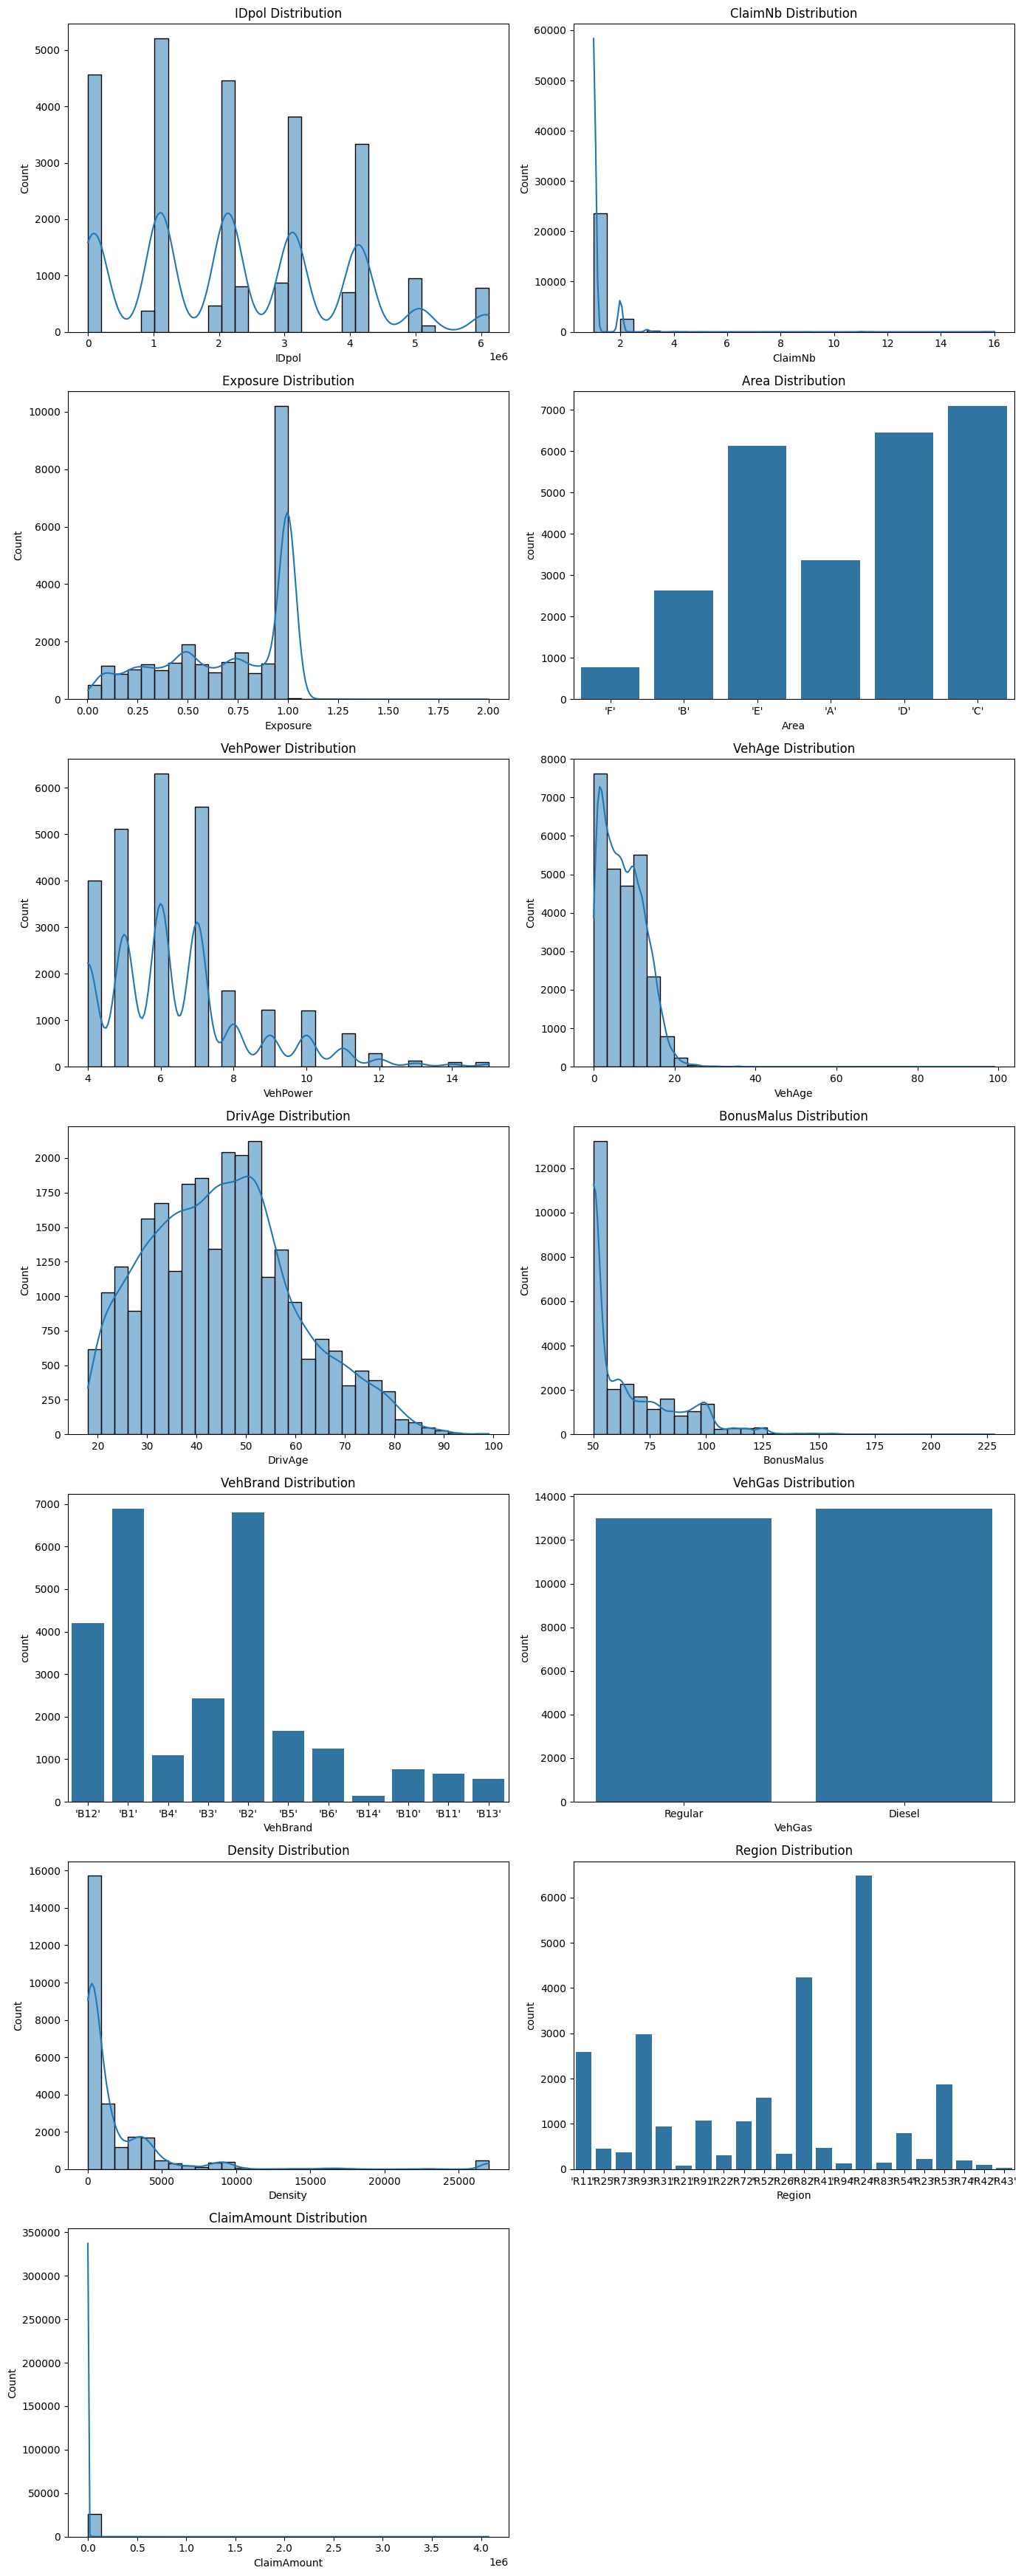

In [5]:
plot_feature_distributions(df)

### Zusammenfassung der Ergebnisse:

- **Fehlende Werte**: Keine der Variablen weist fehlende Werte auf, was bedeutet, dass ich direkt mit den vollständigen Daten arbeiten kann, ohne dass eine Imputation erforderlich ist.
- **Deskriptive Statistik**: Die deskriptive Statistik liefert uns einen Überblick über die zentralen Tendenzen und die Streuung der Daten. Zum Beispiel hat `ClaimAmount` eine große Spannweite, was auf starke Variabilität hinweist.
- **Merkmalverteilungen**: Die Visualisierungen zeigen, dass einige Merkmale wie `BonusMalus` und `ClaimNb` stark verzerrt sind, was möglicherweise weitere Transformationen oder besondere Modellierungstechniken erfordert.

# Feature-Engineering und Berechnung neuer Merkmale

In diesem Abschnitt erstelle ich neue Merkmale basierend auf den bestehenden Variablen, um die Modellentwicklung zu unterstützen. Dazu gehören Ratenberechnungen, Kategorienbildung und log-Transformationen.

In [6]:
# ClaimRate
df['ClaimRate'] = df['ClaimNb'] / df['Exposure']

# AverageClaimAmount
df['AverageClaimAmount'] = df.apply(lambda row: row['ClaimAmount'] / row['ClaimNb'] if row['ClaimNb'] > 0 else 0, axis=1)

# VehAgeCategorical
df['VehAgeCategorical'] = pd.cut(df['VehAge'], bins=[0, 3, 7, 11, float('inf')], labels=['0-3', '4-7', '8-11', '12+'], include_lowest=True)

# DrivAgeCategorical
df['DrivAgeCategorical'] = pd.cut(df['DrivAge'], bins=[18, 30, 45, 60, float('inf')], labels=['18-30', '31-45', '46-60', '61+'], include_lowest=True)

# VehPowerPerAge
df['VehAge'].replace(0, 1, inplace=True)
df['VehPowerPerAge'] = df['VehPower'] / df['VehAge']

import numpy as np
df['LogDensity'] = np.log1p(df['Density'])
df['LogBonusMalus'] = np.log1p(df['BonusMalus'])

# Calculation of target variable: annual amount of loss per client
df['AnnualLoss'] = df['ClaimAmount'] / df['Exposure']

/var/folders/rg/njlbz7491lj6f1k3_v61b4zh0000gn/T/ipykernel_2626/3462523499.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VehAge'].replace(0, 1, inplace=True)


### Erläuterungen zu den neuen Merkmalen:

- **ClaimRate**: Die Schadensrate (`ClaimRate`) ist ein Schlüsselmerkmal, das das Risiko eines Kunden in Bezug auf die Anzahl der Schadensfälle pro Jahr bewertet.
- **AverageClaimAmount**: Der durchschnittliche Schadensbetrag (`AverageClaimAmount`) gibt Aufschluss über die durchschnittliche Höhe der Schadensforderungen pro Schadensfall und ist für die Vorhersage zukünftiger Verluste nützlich. **(Update 14.8.2024: Ich mache mir Sorgen, dass dieses Merkmal während des Trainings zu einem Datenleck führen könnte.)**
- **VehAgeCategorical und DrivAgeCategorical**: Diese Kategorisierungen erleichtern es dem Modell, potenziell nichtlineare Beziehungen zwischen Fahrzeug- bzw. Fahreralter und dem Schadensrisiko zu erkennen.
- **VehPowerPerAge**: Dieses Merkmal gibt an, wie viel Leistung ein Fahrzeug pro Altersjahr hat, was als Indikator für die Fahrzeugabnutzung und damit das Risiko angesehen werden kann.
- **LogDensity und LogBonusMalus**: Die logarithmischen Transformationen von Dichte und Bonus-Malus-Koeffizient (`LogDensity` und `LogBonusMalus`) helfen, Verteilungen mit starker Schiefe zu normalisieren und ermöglichen dem Modell, feinere Muster zu erkennen.
- **AnnualLoss**: Die jährliche Verlustsumme (`AnnualLoss`) ist die Zielvariable und gibt den Verlust pro Versicherungsnehmer in einem Jahr an, normalisiert durch die Versicherungsdauer.

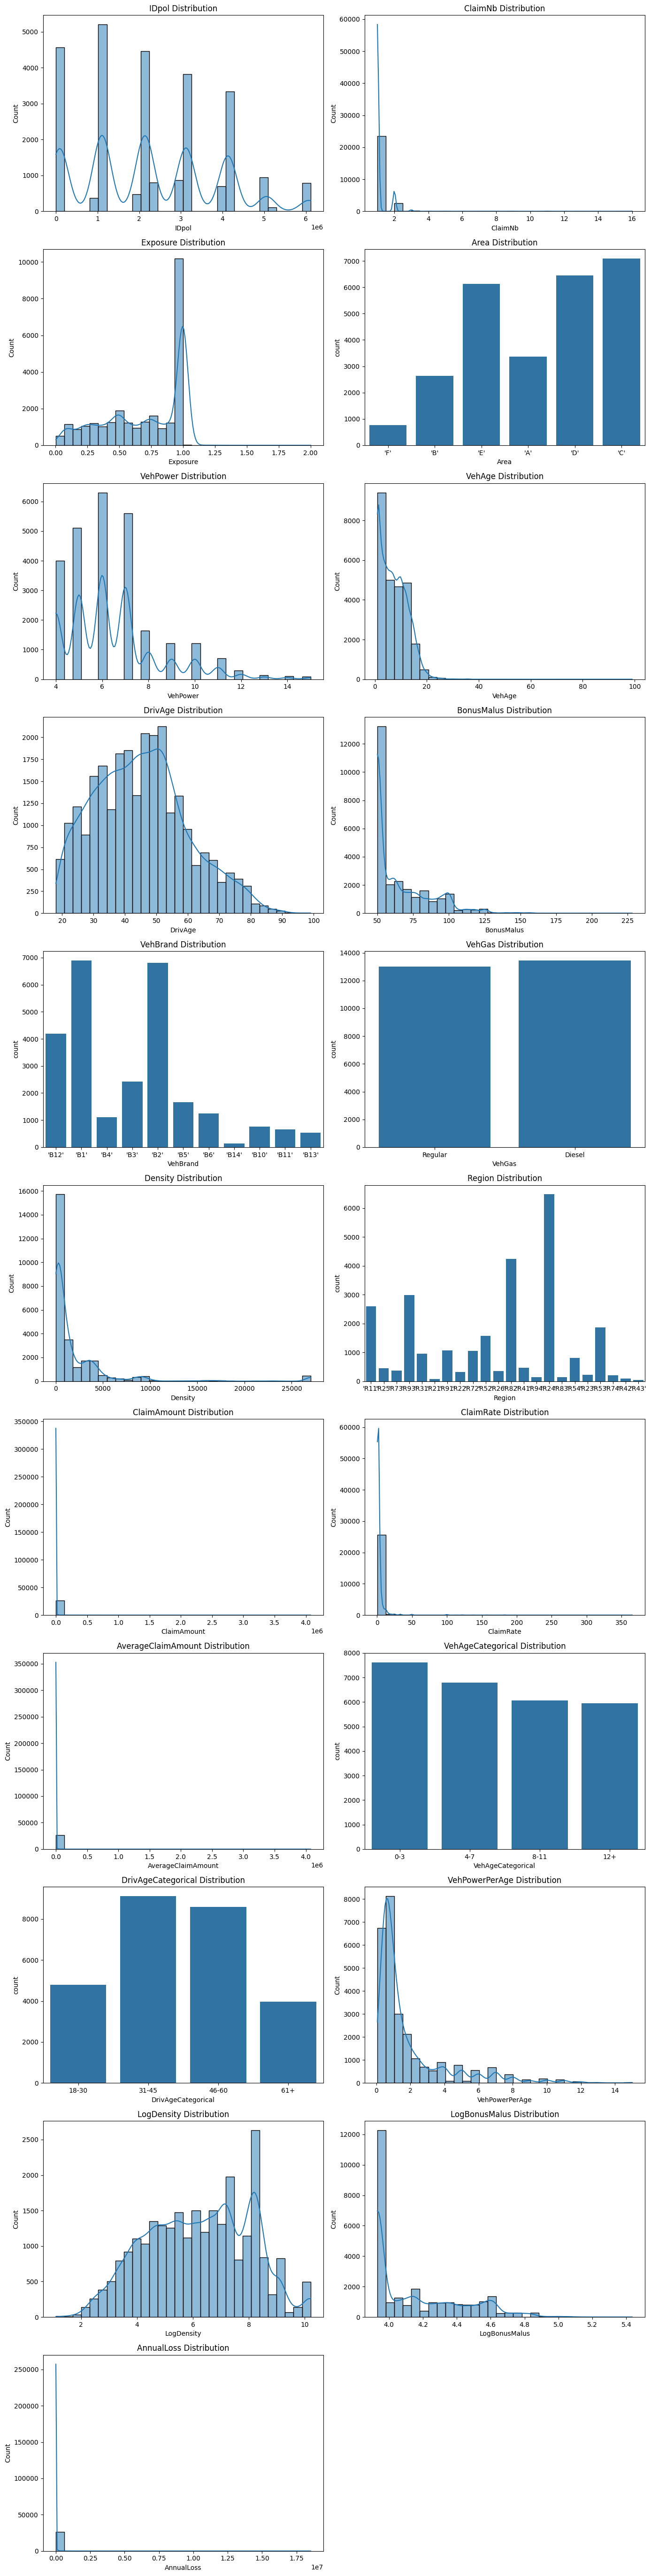

In [6]:
plot_feature_distributions(df)

# Update 14.8.2024
Hier habe ich einen Fehler gemacht: Im folgenden Training habe ich fälschlicherweise den Label Encoder für kategoriale Merkmale direkt verwendet, was dazu führen könnte, dass das Modell aufgrund der numerischen Größe der Label-Werte Verzerrungen aufweist. Obwohl dies nicht unbedingt der Fall sein muss, habe ich sicherheitshalber das Training erneut mit One-Hot-Encoding durchgeführt. Aufgrund begrenzter Zeit und meiner Hardwarekapazitäten – ich habe das Training auf einem Laptop mit CPU durchgeführt – konnte ich nur zwei Modelle mit den neuen Hyperparametern und dem One-Hot-Encoding am Ende des Notebooks erneut trainieren.

### Label-Encoding für kategoriale Variablen

In diesem Abschnitt führe ich das Label-Encoding für die kategorialen Variablen durch. Das Label-Encoding ordnet jeder Kategorie einer kategorialen Variable eine eindeutige numerische Kennzeichnung zu. Dies ist notwendig, da die meisten maschinellen Lernmodelle nur mit numerischen Daten arbeiten können.

In [44]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for categorical features
label_encoders = {}
for column in ['Area', 'VehBrand', 'VehGas', 'Region', 'VehAgeCategorical', 'DrivAgeCategorical']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

### Erläuterungen zum Label-Encoding:

- **Kategoriale Variablen**: Die Merkmale `Area`, `VehBrand`, `VehGas`, `Region`, `VehAgeCategorical` und `DrivAgeCategorical` sind ursprünglich als kategoriale Variablen kodiert, was bedeutet, dass sie verschiedene Kategorien enthalten, die durch Texte oder Symbole repräsentiert werden.
- **Label-Encoding**: Durch das Label-Encoding werden diese Kategorien in eindeutige numerische Werte umgewandelt, was die Verarbeitung durch maschinelle Lernmodelle ermöglicht. Zum Beispiel könnte eine Kategorie wie `VehBrand` mit den Werten `"B1"`, `"B2"` und `"B3"` in `0`, `1` und `2` umgewandelt werden.
- **Speicherung der Encoder**: Die LabelEncoder-Objekte werden in einem Dictionary (`label_encoders`) gespeichert, falls es notwendig ist, später die Originalwerte wiederherzustellen oder die Encoder für neue Daten zu verwenden.

### Modellauswahl und Training

In diesem Abschnitt bereite ich die Daten für das Training vor, indem ich sie in Trainings- und Testsets aufteile, polynomial erweiterte Merkmale erzeuge und die Daten skaliere. Anschließend definiere ich mehrere Modelle und führe eine Hyperparameter-Optimierung durch, um die besten Modelle für meine Vorhersageaufgabe zu finden. Schließlich bewerte ich die Modelle anhand ihrer Leistung auf den Trainings- und Testdaten.

### Hyperparameter-Optimierung und Modellauswahl

Ich definiere verschiedene Modelle (RandomForest, GradientBoosting, XGBoost, SVR) und führe eine Hyperparameter-Optimierung durch, um die besten Parameter für jedes Modell zu finden. Dazu verwende ich GridSearchCV mit 5-facher Kreuzvalidierung.

### Modellbewertung und Vergleich der Modelle

Nach der Hyperparameter-Optimierung bewerte ich die besten Modelle auf Basis ihrer Kreuzvalidierungs-Root-Mean-Squared-Error (RMSE) und teste sie auf dem Testset, um die Leistung auf ungesehenen Daten zu beurteilen.

### Analyse der Feature-Wichtigkeit (RandomForest und GradientBoosting)

Ich analysiere die Wichtigkeit der Merkmale, die von den RandomForest- und GradientBoosting-Modellen verwendet werden. Diese Analyse hilft mir zu verstehen, welche Merkmale den größten Einfluss auf die Vorhersagen der Modelle haben.

/opt/miniconda3/envs/code/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomForest best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
RandomForest best CV score: 10348235891.256176
GradientBoosting best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
GradientBoosting best CV score: 3320632815.0550447
XGBoost best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
XGBoost best CV score: 18443405696.890335


/opt/miniconda3/envs/code/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


SVR best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
SVR best CV score: 26200657835.045113
RandomForest Cross-validated RMSE: 84238.3417654502 ± 57027.51676044982
GradientBoosting Cross-validated RMSE: 46019.60327971154 ± 34681.82418837002
XGBoost Cross-validated RMSE: 104457.31818871353 ± 86787.52429763273
SVR Cross-validated RMSE: 134955.31932670198 ± 89374.04332619742


/opt/miniconda3/envs/code/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/miniconda3/envs/code/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/miniconda3/envs/code/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RandomForest Test RMSE: 11779.242945259484
GradientBoosting Test RMSE: 6402.628683832411
XGBoost Test RMSE: 35037.19349638581


/opt/miniconda3/envs/code/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SVR Test RMSE: 72714.87957193874


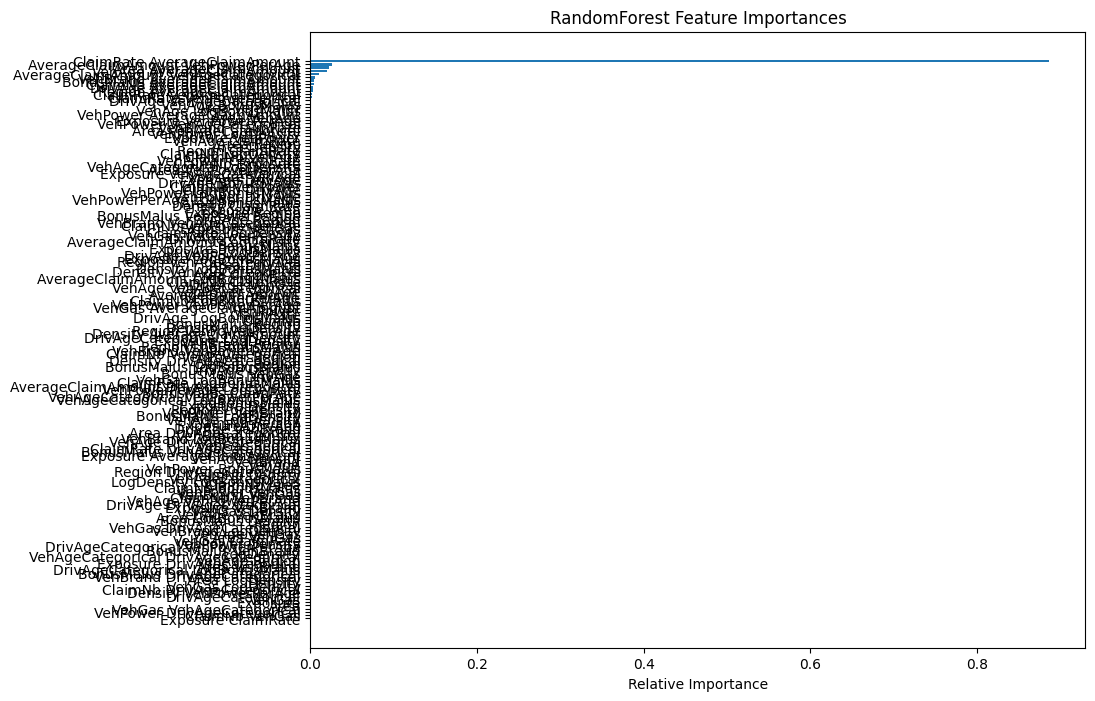

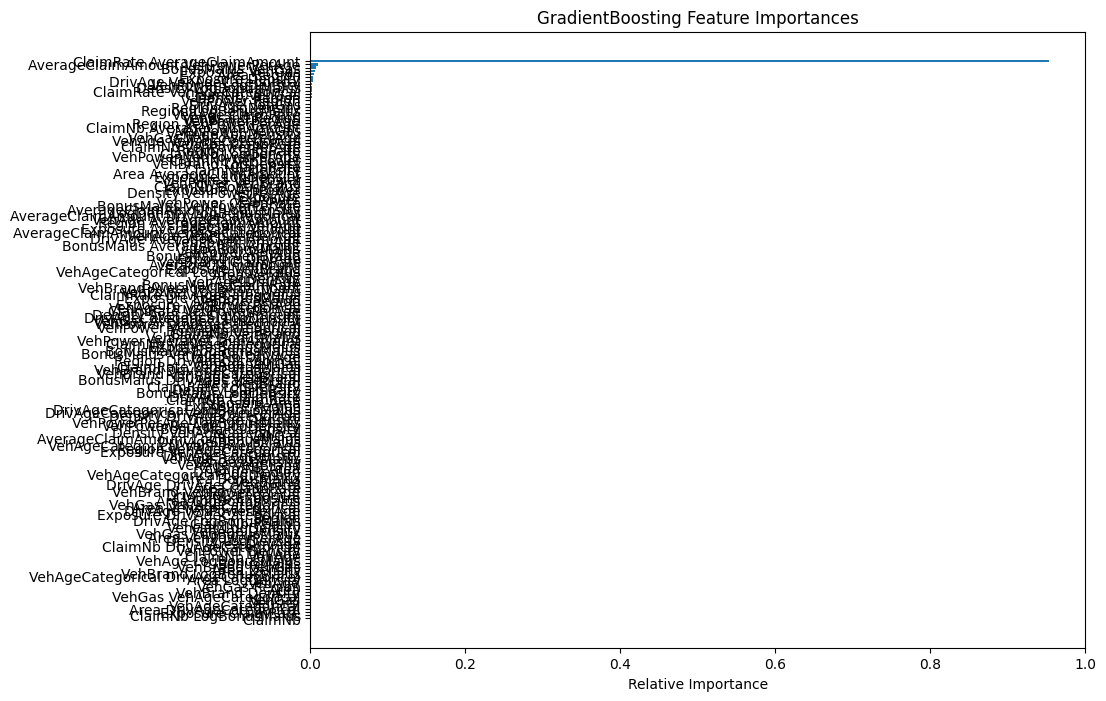

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


# Prepare the data
X = df.drop(columns=['IDpol', 'ClaimAmount', 'AnnualLoss'])
y = df['AnnualLoss']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Advanced feature engineering - Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Define models and parameters
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVR': SVR()
}

param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 7]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly']
    }
}

# Hyperparameter tuning and cross-validation
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f'{name} best parameters: {grid_search.best_params_}')
    print(f'{name} best CV score: {-grid_search.best_score_}')

# Evaluate the best models
for name, model in best_models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f'{name} Cross-validated RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}')

# Evaluate the best models on the test set
for name, model in best_models.items():
    test_preds = model.predict(X_test_scaled)
    test_rmse = mean_squared_error(y_test, test_preds, squared=False)
    print(f'{name} Test RMSE: {test_rmse}')

# Feature importance analysis (for RandomForest and GradientBoosting models)
importances_rf = best_models['RandomForest'].feature_importances_
indices_rf = np.argsort(importances_rf)

plt.figure(figsize=(10, 8))
plt.title('RandomForest Feature Importances')
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], align='center')
plt.yticks(range(len(indices_rf)), [poly.get_feature_names_out()[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()

importances_gb = best_models['GradientBoosting'].feature_importances_
indices_gb = np.argsort(importances_gb)

plt.figure(figsize=(10, 8))
plt.title('GradientBoosting Feature Importances')
plt.barh(range(len(indices_gb)), importances_gb[indices_gb], align='center')
plt.yticks(range(len(indices_gb)), [poly.get_feature_names_out()[i] for i in indices_gb])
plt.xlabel('Relative Importance')
plt.show()

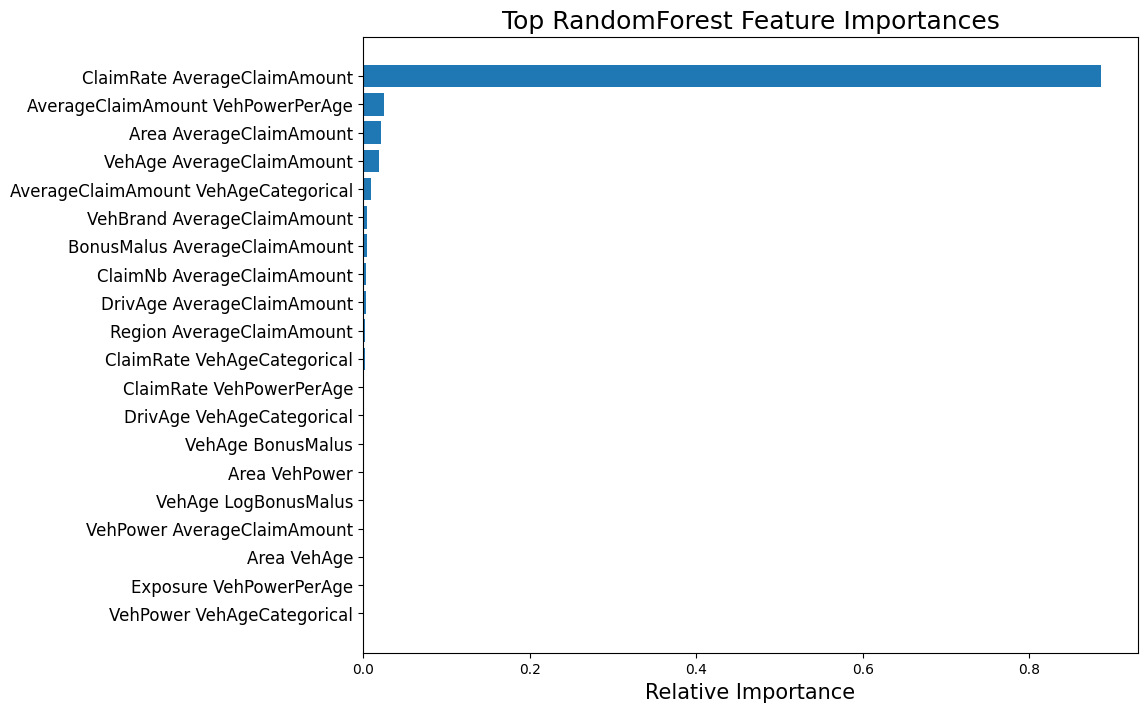

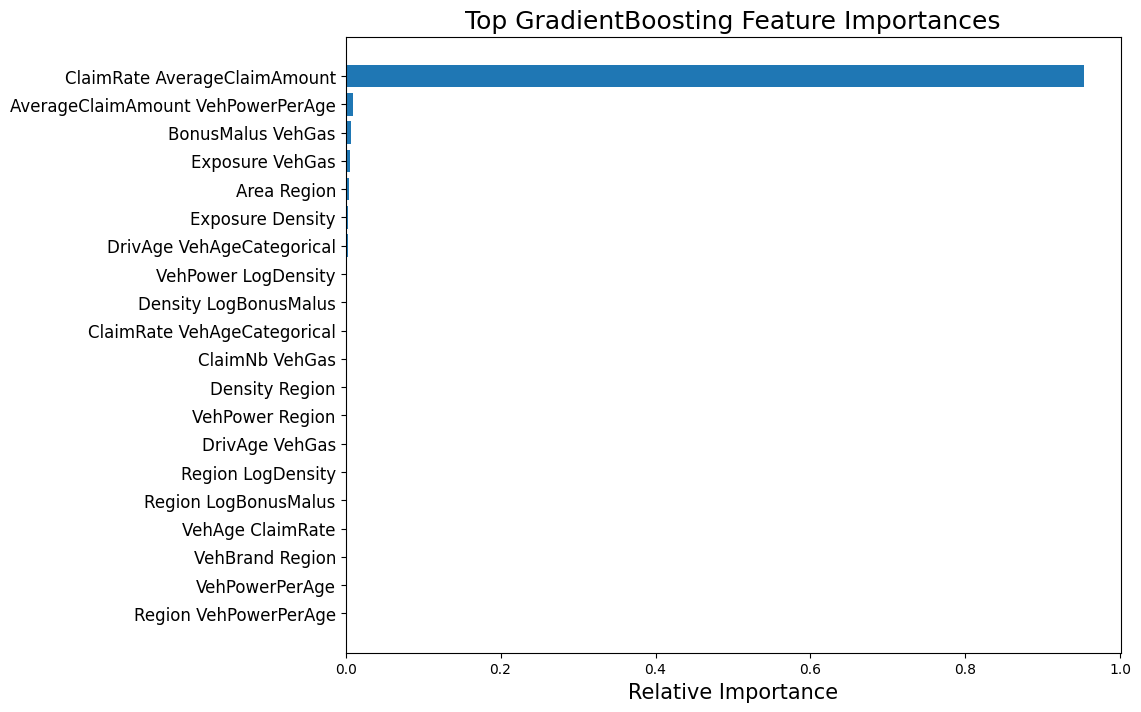

In [52]:
N = 20  # Display only the top 20 most important features

# RandomForest feature importance
top_indices_rf = indices_rf[-N:]
plt.figure(figsize=(10, 8))
plt.title('Top RandomForest Feature Importances', fontsize=18)
plt.barh(range(len(top_indices_rf)), importances_rf[top_indices_rf], align='center')
plt.yticks(range(len(top_indices_rf)), [poly.get_feature_names_out()[i] for i in top_indices_rf], fontsize=12)
plt.xlabel('Relative Importance', fontsize=15)
plt.show()

# GradientBoosting feature importance
top_indices_gb = indices_gb[-N:]
plt.figure(figsize=(10, 8))
plt.title('Top GradientBoosting Feature Importances', fontsize=18)
plt.barh(range(len(top_indices_gb)), importances_gb[top_indices_gb], align='center')
plt.yticks(range(len(top_indices_gb)), [poly.get_feature_names_out()[i] for i in top_indices_gb], fontsize=12)
plt.xlabel('Relative Importance', fontsize=15)
plt.show()

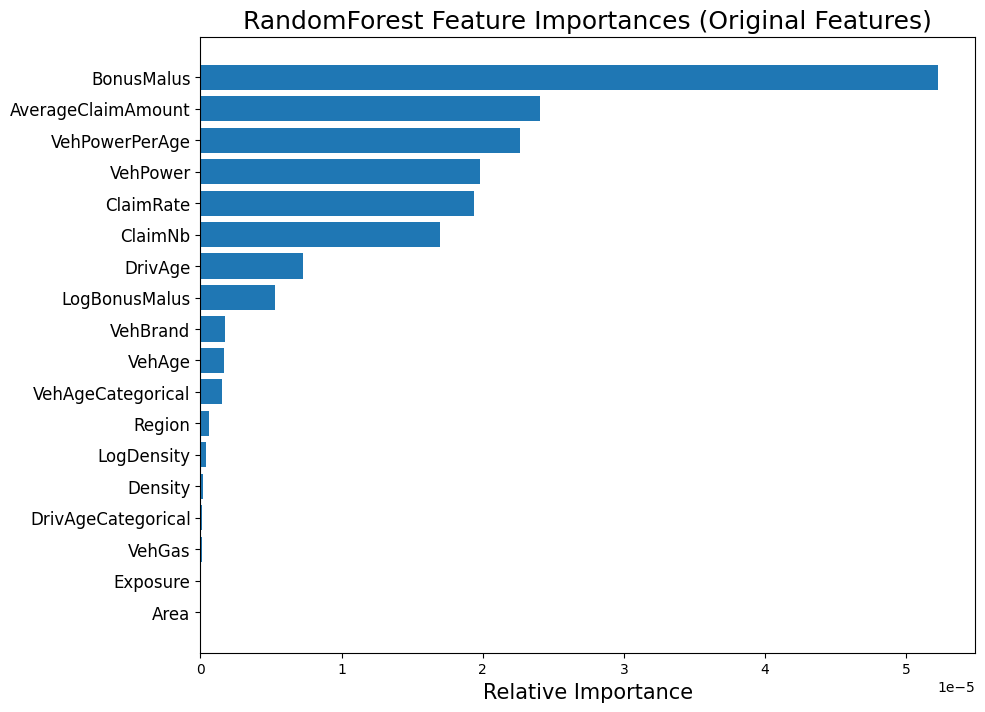

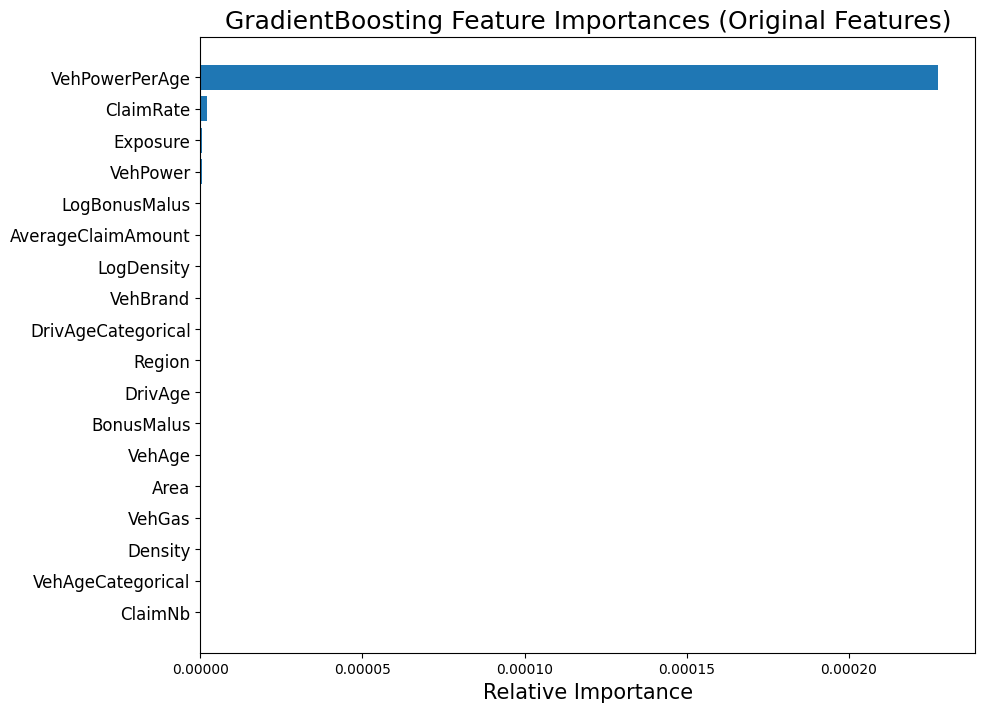

In [54]:
# Get all feature names
feature_names = poly.get_feature_names_out()

# Filter out the original features (excluding the combined features)
original_feature_names = [name for name in feature_names if ' ' not in name]

# Find the indices of these original features in all features
original_indices = [i for i, name in enumerate(feature_names) if ' ' not in name]

# Check the feature importance of these original features - RandomForest
importances_rf_original = importances_rf[original_indices]
indices_rf_original = np.argsort(importances_rf_original)

# Display the feature importance of the original features - RandomForest
N = len(original_indices)  # Display all original features
plt.figure(figsize=(10, 8))
plt.title('RandomForest Feature Importances (Original Features)', fontsize=18)
plt.barh(range(N), importances_rf_original[indices_rf_original], align='center')
plt.yticks(range(N), [original_feature_names[i] for i in indices_rf_original], fontsize=12)
plt.xlabel('Relative Importance', fontsize=15)
plt.show()

# Check the feature importance of these original features - GradientBoosting
importances_gb_original = importances_gb[original_indices]
indices_gb_original = np.argsort(importances_gb_original)

# Display the feature importance of the original features - GradientBoosting
plt.figure(figsize=(10, 8))
plt.title('GradientBoosting Feature Importances (Original Features)', fontsize=18)
plt.barh(range(N), importances_gb_original[indices_gb_original], align='center')
plt.yticks(range(N), [original_feature_names[i] for i in indices_gb_original], fontsize=12)
plt.xlabel('Relative Importance', fontsize=15)
plt.show()

In [46]:
import joblib

# Save each trained model
for name, model in best_models.items():
    joblib.dump(model, f'{name}_model.pkl')
    print(f'{name} model saved as {name}_model.pkl')

RandomForest model saved as RandomForest_model.pkl
GradientBoosting model saved as GradientBoosting_model.pkl
XGBoost model saved as XGBoost_model.pkl
SVR model saved as SVR_model.pkl


In [47]:
# Load models
loaded_models = {}
for name in models.keys():
    loaded_models[name] = joblib.load(f'{name}_model.pkl')
    print(f'{name} model loaded from {name}_model.pkl')

RandomForest model loaded from RandomForest_model.pkl
GradientBoosting model loaded from GradientBoosting_model.pkl
XGBoost model loaded from XGBoost_model.pkl
SVR model loaded from SVR_model.pkl


In [49]:
# Save the best parameters and cross-validation scores
results = {'best_params': {}, 'cv_scores': {}, 'test_rmse': {}}
for name, model in best_models.items():
    results['best_params'][name] = model.get_params()
    results['cv_scores'][name] = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    results['test_rmse'][name] = mean_squared_error(y_test, model.predict(X_test_scaled), squared=False)

# Save results to a file
joblib.dump(results, 'training_results.pkl')
print('Training results saved as training_results.pkl')

/opt/miniconda3/envs/code/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/miniconda3/envs/code/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/miniconda3/envs/code/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training results saved as training_results.pkl


/opt/miniconda3/envs/code/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [55]:
# Load results
loaded_results = joblib.load('training_results.pkl')
print('Loaded training results:', loaded_results)

Loaded training results: {'best_params': {'RandomForest': {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}, 'GradientBoosting': {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}, 'XGBoost': {'objective': 'reg:squarederror', 'base_score': None,

# Training with OneHotEncoder

In [7]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')

# Apply One-Hot encoding to the selected columns
encoded_features = ohe.fit_transform(df[['Area', 'VehBrand', 'VehGas', 'Region', 'VehAgeCategorical', 'DrivAgeCategorical']])

# Get the names of the encoded columns
encoded_feature_names = ohe.get_feature_names_out(['Area', 'VehBrand', 'VehGas', 'Region', 'VehAgeCategorical', 'DrivAgeCategorical'])

# Convert the encoded result into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Merge the encoded DataFrame with the original DataFrame and drop the original columns
df = pd.concat([df.drop(columns=['Area', 'VehBrand', 'VehGas', 'Region', 'VehAgeCategorical', 'DrivAgeCategorical']), encoded_df], axis=1)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import joblib

# Prepare the data
X = df.drop(columns=['IDpol', 'ClaimAmount', 'AnnualLoss'])
y = df['AnnualLoss']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Advanced feature engineering - Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Define models and their optimal parameters
models = {
    'RandomForest': RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_split=5, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)
}

# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    # Cross-validation
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f'{name} Cross-validated RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}')
    
    # Evaluate on the test set
    test_preds = model.predict(X_test_scaled)
    test_rmse = mean_squared_error(y_test, test_preds, squared=False)
    print(f'{name} Test RMSE: {test_rmse}')
    
    # Save the model
    joblib.dump(model, f'{name}_model_onehot.pkl')
    
    # Save the results
    results[name] = {
        'Cross-validated RMSE': rmse_scores.mean(),
        'Test RMSE': test_rmse
    }

# Save all results to a file
pd.DataFrame(results).to_csv('model_results.csv')

RandomForest Cross-validated RMSE: 78708.31322013079 ± 59438.48078731016


/opt/miniconda3/envs/code/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RandomForest Test RMSE: 8380.795144225103
GradientBoosting Cross-validated RMSE: 50582.76750256044 ± 38063.19498186841
GradientBoosting Test RMSE: 6407.73303052806


/opt/miniconda3/envs/code/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


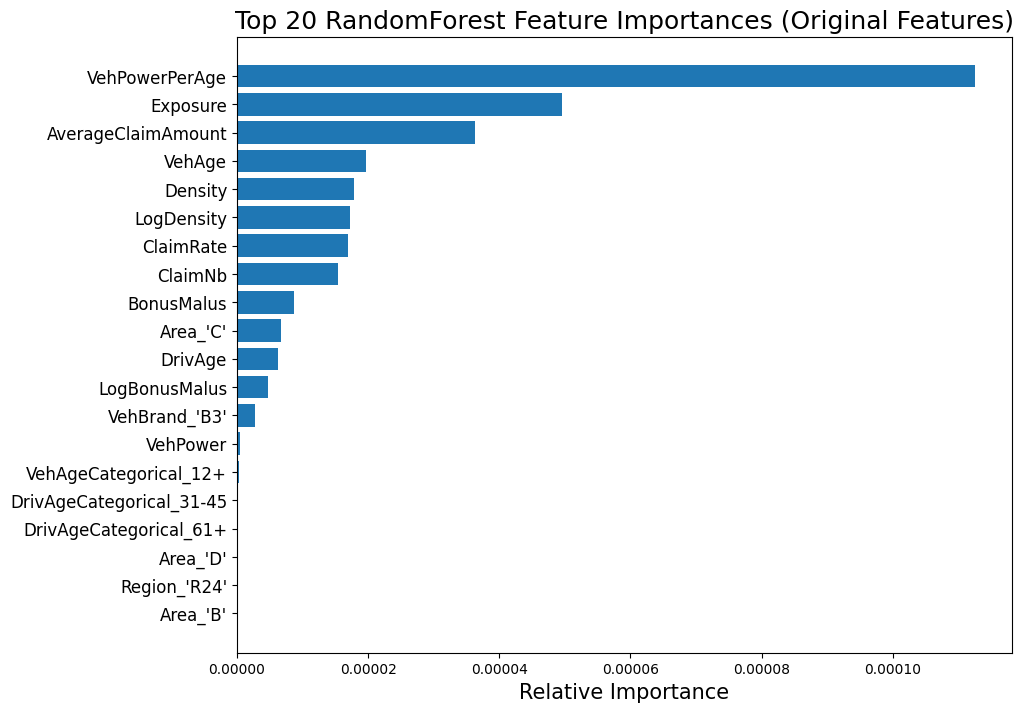

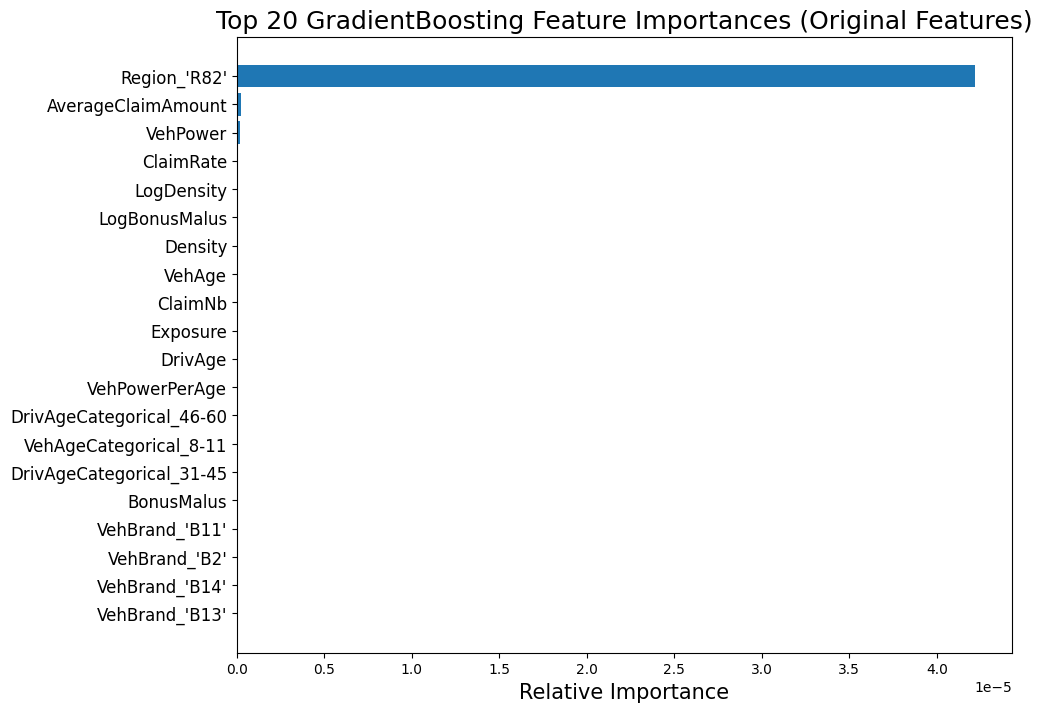

In [11]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load the saved models
rf_model = joblib.load('RandomForest_model_onehot.pkl')
gb_model = joblib.load('GradientBoosting_model_onehot.pkl')

# Get the feature names
feature_names = poly.get_feature_names_out()

# Filter out the original features (excluding interaction features)
original_feature_names = [name for name in feature_names if ' ' not in name]

# Find the indices of these original features in all features
original_indices = [i for i, name in enumerate(feature_names) if ' ' not in name]

# View the feature importances of these original features - RandomForest
importances_rf_original = rf_model.feature_importances_[original_indices]
indices_rf_original = np.argsort(importances_rf_original)[-20:]  # 只选择前20个重要的特征

# Display the feature importances of the original features - RandomForest
plt.figure(figsize=(10, 8))
plt.title('Top 20 RandomForest Feature Importances (Original Features)', fontsize=18)
plt.barh(range(len(indices_rf_original)), importances_rf_original[indices_rf_original], align='center')
plt.yticks(range(len(indices_rf_original)), [original_feature_names[i] for i in indices_rf_original], fontsize=12)
plt.xlabel('Relative Importance', fontsize=15)
plt.show()

# View the feature importances of these original features - GradientBoosting
importances_gb_original = gb_model.feature_importances_[original_indices]
indices_gb_original = np.argsort(importances_gb_original)[-20:]  # 只选择前20个重要的特征

# Display the feature importances of the original features - GradientBoosting
plt.figure(figsize=(10, 8))
plt.title('Top 20 GradientBoosting Feature Importances (Original Features)', fontsize=18)
plt.barh(range(len(indices_gb_original)), importances_gb_original[indices_gb_original], align='center')
plt.yticks(range(len(indices_gb_original)), [original_feature_names[i] for i in indices_gb_original], fontsize=12)
plt.xlabel('Relative Importance', fontsize=15)
plt.show()

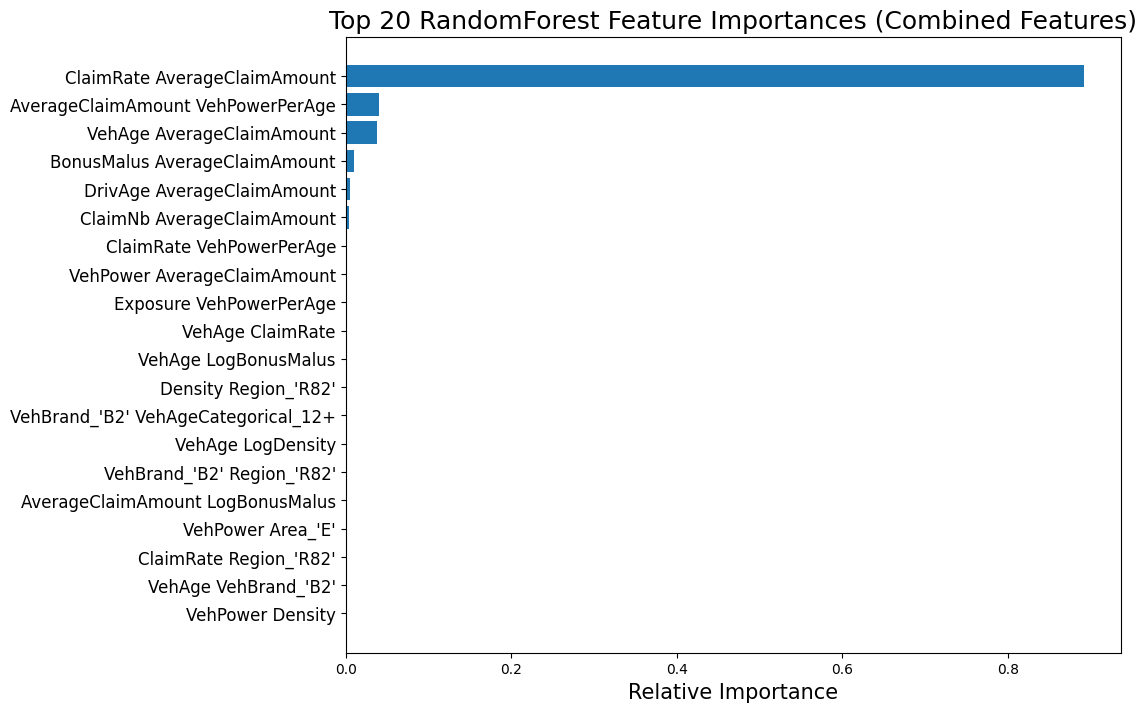

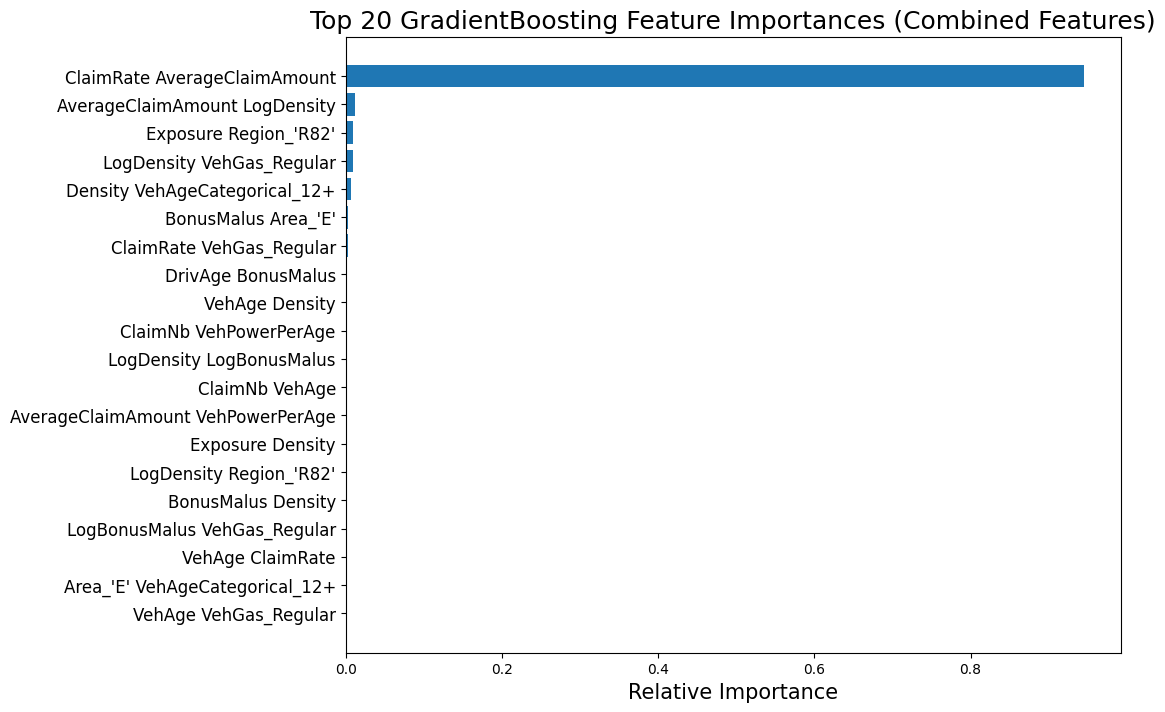

In [13]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load the saved models
rf_model = joblib.load('RandomForest_model_onehot.pkl')
gb_model = joblib.load('GradientBoosting_model_onehot.pkl')

# Get the feature names
feature_names = poly.get_feature_names_out()

# Filter out the combined features (those that include interactions)
combined_feature_names = [name for name in feature_names if ' ' in name]

# Find the indices of these combined features in all features
combined_indices = [i for i, name in enumerate(feature_names) if ' ' in name]

# View the feature importances of these combined features - RandomForest
importances_rf_combined = rf_model.feature_importances_[combined_indices]
indices_rf_combined = np.argsort(importances_rf_combined)[-20:]  # Select only the top 20 important combined features

# Display the feature importances of the combined features - RandomForest
plt.figure(figsize=(10, 8))
plt.title('Top 20 RandomForest Feature Importances (Combined Features)', fontsize=18)
plt.barh(range(len(indices_rf_combined)), importances_rf_combined[indices_rf_combined], align='center')
plt.yticks(range(len(indices_rf_combined)), [combined_feature_names[i] for i in indices_rf_combined], fontsize=12)
plt.xlabel('Relative Importance', fontsize=15)
plt.show()

# View the feature importances of these combined features - GradientBoosting
importances_gb_combined = gb_model.feature_importances_[combined_indices]
indices_gb_combined = np.argsort(importances_gb_combined)[-20:]  # Select only the top 20 important combined features

# Display the feature importances of the combined features - GradientBoosting
plt.figure(figsize=(10, 8))
plt.title('Top 20 GradientBoosting Feature Importances (Combined Features)', fontsize=18)
plt.barh(range(len(indices_gb_combined)), importances_gb_combined[indices_gb_combined], align='center')
plt.yticks(range(len(indices_gb_combined)), [combined_feature_names[i] for i in indices_gb_combined], fontsize=12)
plt.xlabel('Relative Importance', fontsize=15)
plt.show()